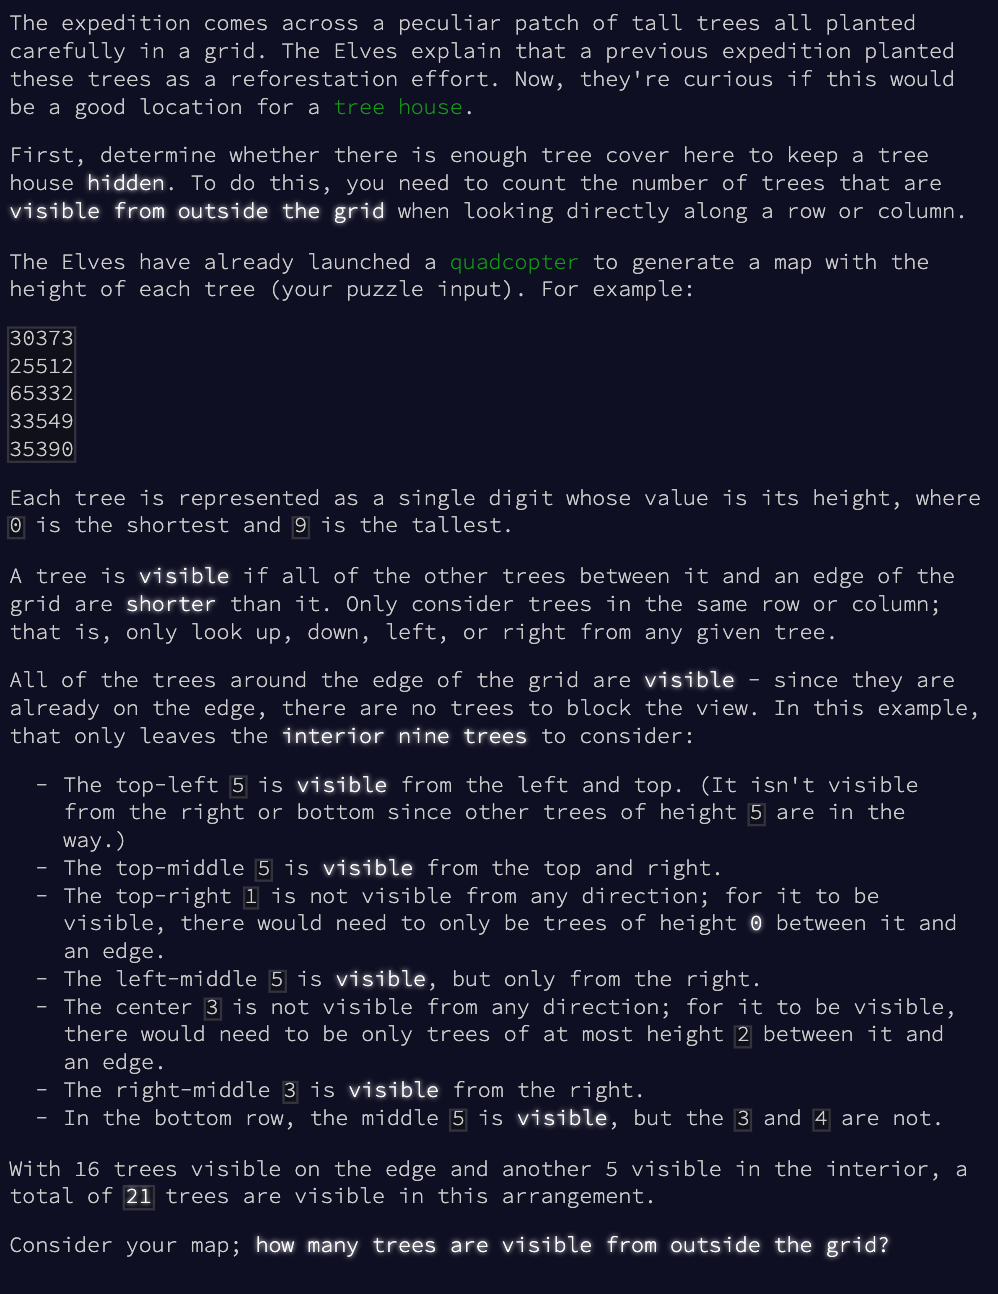

In [1]:
from IPython import display
display.Image("day8part1instructions.jpeg")

In [2]:
with open('day8input.txt') as day8input:
    raw_input = day8input.read()

raw_input[:1000]

'300030213213113240234210203330153124541151003015456312312442524531405533542450111443312103110220211\n133000004421300341005340432514034555543556261543410250030436135103304323425502113341331442032311030\n213121312230422241205230130541010120012561656126511652636160154566425231221254515542342023142010133\n210020103232311410025023513110540633654032560666266266442224400244155120504322112255323444432301210\n300221311013444150512444105105055122104524660253365233115442634642236455351502043504233200041232000\n000000011130235121555143014441555205423003555504400645452656322632050035240315440035451003103431431\n012142333141321404105321351332544222551046221101044054031533500165110422142125530252401331243211232\n020213033022012453014033014405001564353352011316633456214232621532251606161624054400501054130430422\n042314012030233125141141244243333123002627374716422264424361631360462131201236611502353523210122300\n211224020402441314100154352420322456122364263545772174674761655261311042611615130513350241

In [3]:
input_list = raw_input.splitlines()

input_list[:20]

['300030213213113240234210203330153124541151003015456312312442524531405533542450111443312103110220211',
 '133000004421300341005340432514034555543556261543410250030436135103304323425502113341331442032311030',
 '213121312230422241205230130541010120012561656126511652636160154566425231221254515542342023142010133',
 '210020103232311410025023513110540633654032560666266266442224400244155120504322112255323444432301210',
 '300221311013444150512444105105055122104524660253365233115442634642236455351502043504233200041232000',
 '000000011130235121555143014441555205423003555504400645452656322632050035240315440035451003103431431',
 '012142333141321404105321351332544222551046221101044054031533500165110422142125530252401331243211232',
 '020213033022012453014033014405001564353352011316633456214232621532251606161624054400501054130430422',
 '042314012030233125141141244243333123002627374716422264424361631360462131201236611502353523210122300',
 '21122402040244131410015435242032245612236426354577217467476165

In [4]:
grid_length = len(input_list)

grid_length

99

In [5]:
grid_width = len(input_list[0])

grid_width

99

In [6]:
# convert to list of lists of ints : 99 lists (rows) with 99 trees each

rows = []

for line in input_list:
    line_to_int = []
    for tree in line:
        line_to_int.append(int(tree))
    rows.append(line_to_int)

print(rows[:3])

[[3, 0, 0, 0, 3, 0, 2, 1, 3, 2, 1, 3, 1, 1, 3, 2, 4, 0, 2, 3, 4, 2, 1, 0, 2, 0, 3, 3, 3, 0, 1, 5, 3, 1, 2, 4, 5, 4, 1, 1, 5, 1, 0, 0, 3, 0, 1, 5, 4, 5, 6, 3, 1, 2, 3, 1, 2, 4, 4, 2, 5, 2, 4, 5, 3, 1, 4, 0, 5, 5, 3, 3, 5, 4, 2, 4, 5, 0, 1, 1, 1, 4, 4, 3, 3, 1, 2, 1, 0, 3, 1, 1, 0, 2, 2, 0, 2, 1, 1], [1, 3, 3, 0, 0, 0, 0, 0, 4, 4, 2, 1, 3, 0, 0, 3, 4, 1, 0, 0, 5, 3, 4, 0, 4, 3, 2, 5, 1, 4, 0, 3, 4, 5, 5, 5, 5, 4, 3, 5, 5, 6, 2, 6, 1, 5, 4, 3, 4, 1, 0, 2, 5, 0, 0, 3, 0, 4, 3, 6, 1, 3, 5, 1, 0, 3, 3, 0, 4, 3, 2, 3, 4, 2, 5, 5, 0, 2, 1, 1, 3, 3, 4, 1, 3, 3, 1, 4, 4, 2, 0, 3, 2, 3, 1, 1, 0, 3, 0], [2, 1, 3, 1, 2, 1, 3, 1, 2, 2, 3, 0, 4, 2, 2, 2, 4, 1, 2, 0, 5, 2, 3, 0, 1, 3, 0, 5, 4, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 5, 6, 1, 6, 5, 6, 1, 2, 6, 5, 1, 1, 6, 5, 2, 6, 3, 6, 1, 6, 0, 1, 5, 4, 5, 6, 6, 4, 2, 5, 2, 3, 1, 2, 2, 1, 2, 5, 4, 5, 1, 5, 5, 4, 2, 3, 4, 2, 0, 2, 3, 1, 4, 2, 0, 1, 0, 1, 3, 3]]


In [7]:
# mark visible trees 'v'

# viewing across each row (left to right)
# all edge trees are visible 
# if an inner tree doesn't have a taller tree to its left or right (no matter how far away) its visible

checked_rows = []

for r in range(99):
    checked_row = []
    row = rows[r]
    for t in range(99):
        if t == 0 or t == 98:
            checked_row.append('v')
        else:
            tree = row[t]
            left_view = row[:t]
            right_view = row[t+1:]
            if tree > max(left_view) or tree > max(right_view):
                checked_row.append('v')
            else:
                checked_row.append(tree)
    checked_rows.append(checked_row)
 
print(rows[0])
print()
print(checked_rows[0]) 

[3, 0, 0, 0, 3, 0, 2, 1, 3, 2, 1, 3, 1, 1, 3, 2, 4, 0, 2, 3, 4, 2, 1, 0, 2, 0, 3, 3, 3, 0, 1, 5, 3, 1, 2, 4, 5, 4, 1, 1, 5, 1, 0, 0, 3, 0, 1, 5, 4, 5, 6, 3, 1, 2, 3, 1, 2, 4, 4, 2, 5, 2, 4, 5, 3, 1, 4, 0, 5, 5, 3, 3, 5, 4, 2, 4, 5, 0, 1, 1, 1, 4, 4, 3, 3, 1, 2, 1, 0, 3, 1, 1, 0, 2, 2, 0, 2, 1, 1]

['v', 0, 0, 0, 3, 0, 2, 1, 3, 2, 1, 3, 1, 1, 3, 2, 'v', 0, 2, 3, 4, 2, 1, 0, 2, 0, 3, 3, 3, 0, 1, 'v', 3, 1, 2, 4, 5, 4, 1, 1, 5, 1, 0, 0, 3, 0, 1, 5, 4, 5, 'v', 3, 1, 2, 3, 1, 2, 4, 4, 2, 5, 2, 4, 5, 3, 1, 4, 0, 5, 5, 3, 3, 5, 4, 2, 4, 'v', 0, 1, 1, 1, 4, 'v', 3, 3, 1, 2, 1, 0, 'v', 1, 1, 0, 2, 2, 0, 'v', 1, 'v']


In [8]:
# flipping map (transpose) so columns listed instead of rows

import numpy as np

cols = []
rows_arr = np.array(rows)

for n in range(99):
    cols.append(list(rows_arr[:,n]))

print(cols[:3])

[[3, 1, 2, 2, 3, 0, 0, 0, 0, 2, 3, 4, 0, 3, 1, 2, 1, 3, 0, 1, 1, 4, 1, 4, 0, 4, 1, 1, 5, 2, 2, 1, 5, 0, 2, 3, 1, 1, 4, 2, 0, 4, 3, 1, 0, 5, 6, 5, 4, 4, 3, 2, 4, 3, 2, 4, 0, 3, 1, 2, 3, 4, 3, 5, 1, 0, 2, 5, 4, 1, 4, 0, 0, 2, 4, 0, 2, 1, 2, 4, 0, 4, 4, 4, 0, 0, 3, 4, 1, 1, 4, 4, 0, 2, 0, 0, 3, 0, 3], [0, 3, 1, 1, 0, 0, 1, 2, 4, 1, 1, 3, 0, 3, 2, 4, 2, 1, 2, 0, 2, 3, 0, 2, 2, 4, 5, 4, 4, 2, 3, 5, 0, 0, 5, 0, 1, 1, 1, 2, 6, 5, 0, 5, 1, 1, 6, 6, 4, 6, 2, 2, 0, 5, 2, 6, 5, 1, 5, 5, 5, 2, 4, 3, 4, 5, 5, 5, 1, 0, 5, 0, 2, 0, 1, 0, 3, 4, 3, 5, 1, 1, 4, 3, 4, 3, 3, 4, 1, 4, 1, 0, 4, 0, 1, 2, 1, 1, 1], [0, 3, 3, 0, 0, 0, 2, 0, 2, 1, 4, 0, 1, 4, 1, 2, 2, 0, 5, 5, 0, 2, 5, 4, 1, 5, 2, 0, 4, 5, 0, 0, 1, 3, 1, 2, 1, 0, 2, 0, 1, 1, 1, 4, 6, 6, 3, 4, 4, 2, 4, 4, 2, 1, 5, 4, 2, 6, 0, 2, 6, 5, 5, 3, 5, 4, 4, 5, 4, 3, 2, 0, 3, 4, 1, 2, 2, 0, 0, 5, 5, 4, 4, 3, 3, 4, 4, 4, 3, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1]]


In [9]:
# mark visible trees 'v'

# viewing across each col
# all edge trees are visible 
# if an inner tree doesn't have a taller tree above or below it (left or right in the list) its visible

checked_cols = []

for c in range(99):
    checked_col = []
    col = cols[c]
    for t in range(99):
        if t == 0 or t == 98:
            checked_col.append('v')
        else:
            tree = col[t]
            left_view = col[:t]
            right_view = col[t+1:]
            if tree > max(left_view) or tree > max(right_view):
                checked_col.append('v')
            else:
                checked_col.append(tree)
    checked_cols.append(checked_col)
 
print(cols[0])
print()
print(checked_cols[0]) 

[3, 1, 2, 2, 3, 0, 0, 0, 0, 2, 3, 4, 0, 3, 1, 2, 1, 3, 0, 1, 1, 4, 1, 4, 0, 4, 1, 1, 5, 2, 2, 1, 5, 0, 2, 3, 1, 1, 4, 2, 0, 4, 3, 1, 0, 5, 6, 5, 4, 4, 3, 2, 4, 3, 2, 4, 0, 3, 1, 2, 3, 4, 3, 5, 1, 0, 2, 5, 4, 1, 4, 0, 0, 2, 4, 0, 2, 1, 2, 4, 0, 4, 4, 4, 0, 0, 3, 4, 1, 1, 4, 4, 0, 2, 0, 0, 3, 0, 3]

['v', 1, 2, 2, 3, 0, 0, 0, 0, 2, 3, 'v', 0, 3, 1, 2, 1, 3, 0, 1, 1, 4, 1, 4, 0, 4, 1, 1, 'v', 2, 2, 1, 5, 0, 2, 3, 1, 1, 4, 2, 0, 4, 3, 1, 0, 5, 'v', 5, 4, 4, 3, 2, 4, 3, 2, 4, 0, 3, 1, 2, 3, 4, 3, 5, 1, 0, 2, 'v', 4, 1, 4, 0, 0, 2, 4, 0, 2, 1, 2, 4, 0, 4, 4, 4, 0, 0, 3, 4, 1, 1, 4, 'v', 0, 2, 0, 0, 3, 0, 'v']


In [10]:
# flipping marked cols view back to rows so the order of trees matches the marked rows view

checked_cols_back_to_rows = []
checked_cols_arr = np.array(checked_cols)

for n in range(99):
        checked_cols_back_to_rows.append(list(checked_cols_arr[:,n]))

print(rows[0])
print()
print(checked_rows[0])
print()
print(checked_cols_back_to_rows[0])

# notice every tree in the first row is marked visible in the col view
# makes sense because the first row is an edge

[3, 0, 0, 0, 3, 0, 2, 1, 3, 2, 1, 3, 1, 1, 3, 2, 4, 0, 2, 3, 4, 2, 1, 0, 2, 0, 3, 3, 3, 0, 1, 5, 3, 1, 2, 4, 5, 4, 1, 1, 5, 1, 0, 0, 3, 0, 1, 5, 4, 5, 6, 3, 1, 2, 3, 1, 2, 4, 4, 2, 5, 2, 4, 5, 3, 1, 4, 0, 5, 5, 3, 3, 5, 4, 2, 4, 5, 0, 1, 1, 1, 4, 4, 3, 3, 1, 2, 1, 0, 3, 1, 1, 0, 2, 2, 0, 2, 1, 1]

['v', 0, 0, 0, 3, 0, 2, 1, 3, 2, 1, 3, 1, 1, 3, 2, 'v', 0, 2, 3, 4, 2, 1, 0, 2, 0, 3, 3, 3, 0, 1, 'v', 3, 1, 2, 4, 5, 4, 1, 1, 5, 1, 0, 0, 3, 0, 1, 5, 4, 5, 'v', 3, 1, 2, 3, 1, 2, 4, 4, 2, 5, 2, 4, 5, 3, 1, 4, 0, 5, 5, 3, 3, 5, 4, 2, 4, 'v', 0, 1, 1, 1, 4, 'v', 3, 3, 1, 2, 1, 0, 'v', 1, 1, 0, 2, 2, 0, 'v', 1, 'v']

['v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v'

In [11]:
print(rows[1])
print()
print(checked_rows[1])
print()
print(checked_cols_back_to_rows[1])

# notice the numbers for the second row viewed via 'rows', 'checked_rows', and 'checked_cols_back_to_rows' all match
# but different trees marked 'v' in 'checked_rows' and 'checked_cols_back_to_rows'
# that's because some trees are visible row-wise and others column-wise
# tree's not marked 'v' are not visible from any direction 

[1, 3, 3, 0, 0, 0, 0, 0, 4, 4, 2, 1, 3, 0, 0, 3, 4, 1, 0, 0, 5, 3, 4, 0, 4, 3, 2, 5, 1, 4, 0, 3, 4, 5, 5, 5, 5, 4, 3, 5, 5, 6, 2, 6, 1, 5, 4, 3, 4, 1, 0, 2, 5, 0, 0, 3, 0, 4, 3, 6, 1, 3, 5, 1, 0, 3, 3, 0, 4, 3, 2, 3, 4, 2, 5, 5, 0, 2, 1, 1, 3, 3, 4, 1, 3, 3, 1, 4, 4, 2, 0, 3, 2, 3, 1, 1, 0, 3, 0]

['v', 'v', 3, 0, 0, 0, 0, 0, 'v', 4, 2, 1, 3, 0, 0, 3, 4, 1, 0, 0, 'v', 3, 4, 0, 4, 3, 2, 5, 1, 4, 0, 3, 4, 5, 5, 5, 5, 4, 3, 5, 5, 'v', 2, 6, 1, 5, 4, 3, 4, 1, 0, 2, 5, 0, 0, 3, 0, 4, 3, 'v', 1, 3, 5, 1, 0, 3, 3, 0, 4, 3, 2, 3, 4, 2, 5, 'v', 0, 2, 1, 1, 3, 3, 4, 1, 3, 3, 1, 4, 'v', 2, 0, 3, 2, 3, 1, 1, 0, 'v', 'v']

['1', 'v', 'v', '0', '0', '0', '0', '0', 'v', 'v', 'v', '1', 'v', '0', '0', 'v', '4', 'v', '0', '0', 'v', 'v', 'v', '0', 'v', 'v', '2', 'v', '1', 'v', '0', '3', 'v', 'v', 'v', 'v', '5', '4', 'v', 'v', '5', 'v', 'v', 'v', '1', 'v', 'v', '3', '4', '1', '0', '2', 'v', '0', '0', 'v', '0', '4', '3', 'v', '1', 'v', 'v', '1', '0', 'v', '3', '0', '4', '3', '2', '3', '4', '2', 'v', 'v', '

In [12]:
# loop through row-wise and column-wise view of trees, counting how many other visible from either perspective

visible_tree_count = 0

for r in range(99):
    row_view = checked_rows[r]
    col_view = checked_cols_back_to_rows[r]
    for t in range(99):
        tree_by_row_view = row_view[t]
        tree_by_col_view = col_view[t]
        if tree_by_row_view == 'v' or tree_by_col_view == 'v':
            visible_tree_count += 1

visible_tree_count  

1717

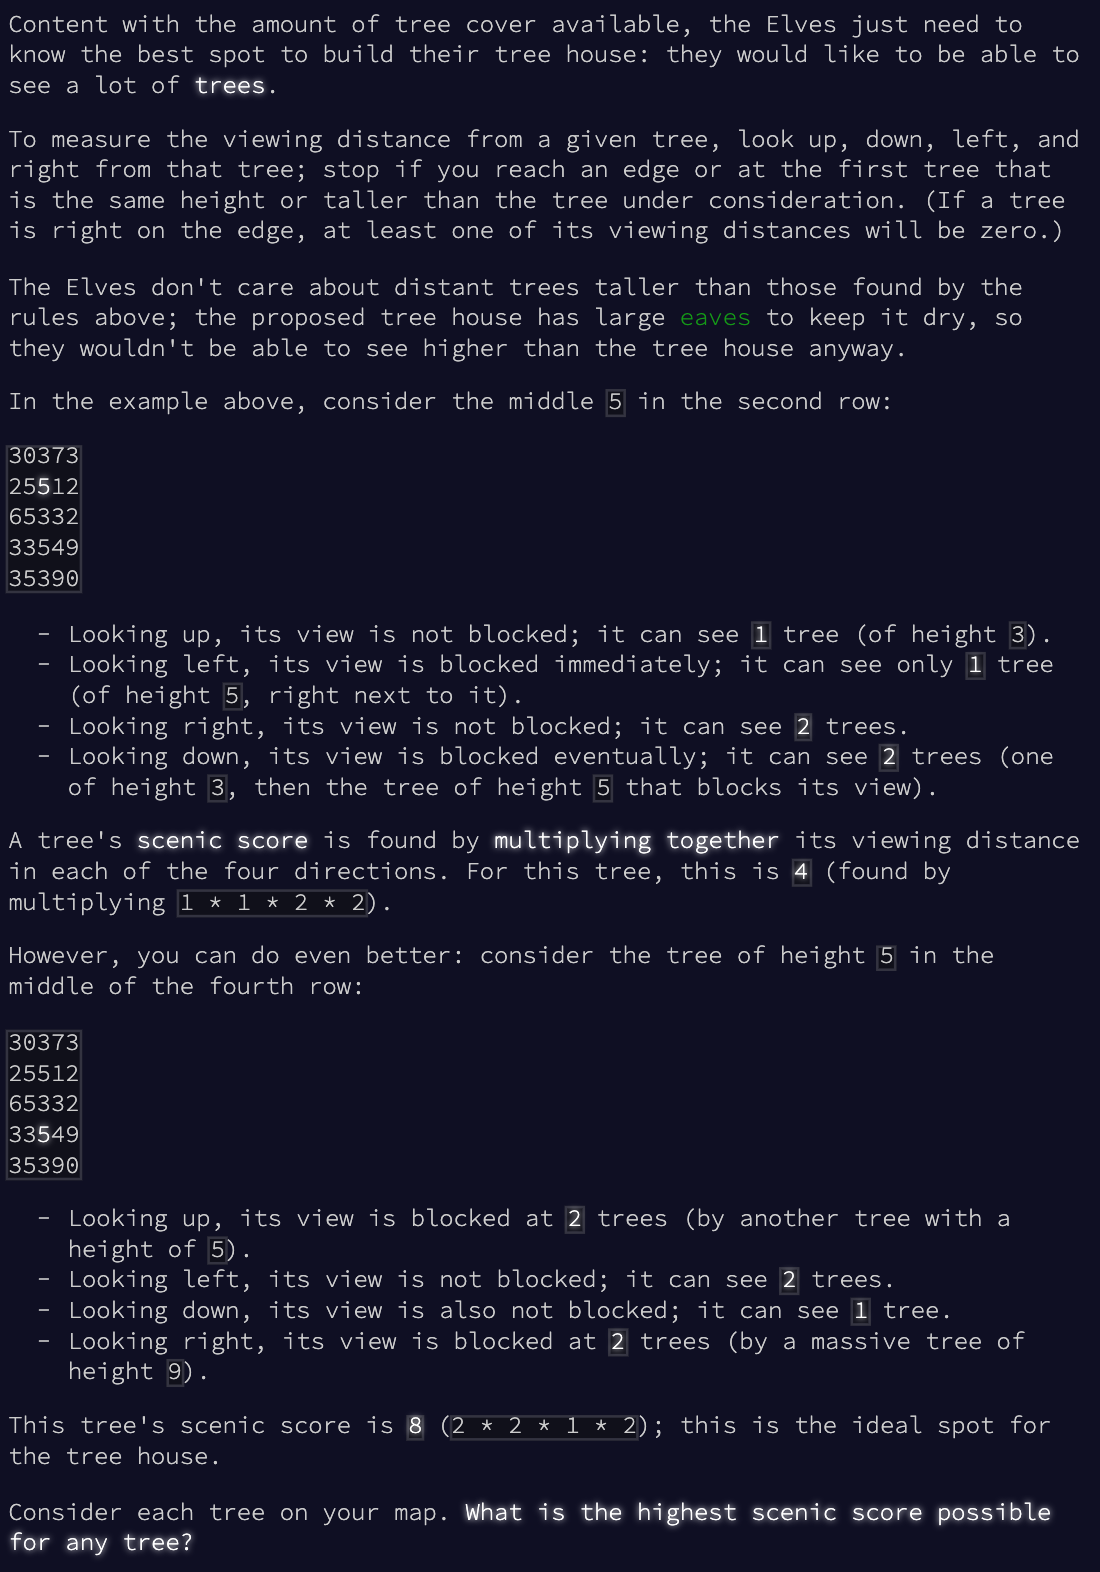

In [13]:
display.Image("day8part2instructions.jpeg")

<b>SOLVING ON EXAMPLE MAP</b>

In [14]:
# building test map (matching example from instructions)

rows = [[3,0,3,7,3],[2,5,5,1,2],[6,5,3,3,2],[3,3,5,4,9],[3,5,3,9,0]]

rows

[[3, 0, 3, 7, 3],
 [2, 5, 5, 1, 2],
 [6, 5, 3, 3, 2],
 [3, 3, 5, 4, 9],
 [3, 5, 3, 9, 0]]

In [15]:
# row edges marked

rows[0] = ['e'] * 5
rows[-1] = ['e'] * 5

rows

[['e', 'e', 'e', 'e', 'e'],
 [2, 5, 5, 1, 2],
 [6, 5, 3, 3, 2],
 [3, 3, 5, 4, 9],
 ['e', 'e', 'e', 'e', 'e']]

In [16]:
# flipping map to col view 

cols = []
rows_arr = np.array(rows)

for n in range(5):
    cols.append(list(rows_arr[:,n]))
    
cols

[['e', '2', '6', '3', 'e'],
 ['e', '5', '5', '3', 'e'],
 ['e', '5', '3', '5', 'e'],
 ['e', '1', '3', '4', 'e'],
 ['e', '2', '2', '9', 'e']]

In [17]:
# col edges marked

cols[0] = ['e'] * 5
cols[-1] = ['e'] * 5

cols

[['e', 'e', 'e', 'e', 'e'],
 ['e', '5', '5', '3', 'e'],
 ['e', '5', '3', '5', 'e'],
 ['e', '1', '3', '4', 'e'],
 ['e', 'e', 'e', 'e', 'e']]

In [18]:
# flipping map back to row view 

rows = []
cols_arr = np.array(cols)

for n in range(5):
    rows.append(list(cols_arr[:,n]))
    
rows

[['e', 'e', 'e', 'e', 'e'],
 ['e', '5', '5', '1', 'e'],
 ['e', '5', '3', '3', 'e'],
 ['e', '3', '5', '4', 'e'],
 ['e', 'e', 'e', 'e', 'e']]

In [19]:
# a tree's scenic score == how many trees it can see in each direction, multiplied: left * right * up * down

# first we will calculate the row-wise (left * right) portion of the score
# edge trees automatically get a score of 0
# for internal trees:
# count how many many trees it can see to the left and to right
# before hitting an equally-tall or taller tree, and multiply these two numbers together 

distance_rows = []

for r in range(5):
    distance_row = []
    row = rows[r]
    for t in range(5):
        tree = row[t]
        if tree == 'e':
            lr_distance = 0
        else:
            l_distance = 1
            view_left = row[:t]
            view_left = view_left[::-1]
            for neighbor in view_left:
                if neighbor == 'e' or neighbor >= tree:
                    break
                else:
                    l_distance += 1
            r_distance = 1
            view_right = row[t+1:]
            for neighbor in view_right:
                if neighbor == 'e' or neighbor >= tree:
                    break
                else:
                    r_distance += 1     
            lr_distance = l_distance * r_distance
        distance_row.append(lr_distance)
    distance_rows.append(distance_row)

distance_rows

[[0, 0, 0, 0, 0],
 [0, 1, 2, 1, 0],
 [0, 3, 1, 1, 0],
 [0, 1, 4, 1, 0],
 [0, 0, 0, 0, 0]]

In [20]:
# next we will calculate the col-wise (up * down) portion of the score
# edge trees automatically get a score of 0
# for internal trees:
# count how many many trees it can see upward and downward (to the left and right in the list)
# before hitting an equally-tall or taller tree, and multiply these two numbers together 

distance_cols = []

for c in range(5):
    distance_col = []
    col = cols[c]
    for t in range(5):
        tree = col[t]
        if tree == 'e':
            ud_distance = 0
        else:
            u_distance = 1
            view_up = col[:t]
            view_up = view_up[::-1]
            for neighbor in view_up:
                if neighbor == 'e' or neighbor >= tree:
                    break
                else:
                    u_distance += 1
            d_distance = 1
            view_down = col[t+1:]
            for neighbor in view_down:
                if neighbor == 'e' or neighbor >= tree:
                    break
                else:
                    d_distance += 1     
            ud_distance = u_distance * d_distance
        distance_col.append(ud_distance)
    distance_cols.append(distance_col)

distance_cols

[[0, 0, 0, 0, 0],
 [0, 1, 2, 1, 0],
 [0, 2, 1, 2, 0],
 [0, 1, 2, 3, 0],
 [0, 0, 0, 0, 0]]

In [21]:
# flip map of col-wise scores back to row view

distance_cols_back_to_rows = []
distance_cols_arr = np.array(distance_cols)

for n in range(5):
        distance_cols_back_to_rows.append(list(distance_cols_arr[:,n]))

distance_cols_back_to_rows

[[0, 0, 0, 0, 0],
 [0, 1, 2, 1, 0],
 [0, 2, 1, 2, 0],
 [0, 1, 2, 3, 0],
 [0, 0, 0, 0, 0]]

In [22]:
# complete the equation by multipling each tree's row-wise score (l * r) by the its column-wise score (u * d)

scenic_scores = []

for ld_scored, ud_scored in zip(distance_rows,distance_cols_back_to_rows):
    for ld_scored_tree, ud_scored_tree in zip(ld_scored,ud_scored):
        scenic_scores.append(ld_scored_tree * ud_scored_tree)

scenic_scores

[0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 0, 6, 1, 2, 0, 0, 1, 8, 3, 0, 0, 0, 0, 0, 0]

In [23]:
max(scenic_scores)

8

<b>SOLVING ON ACTUAL PUZZLE INPUT</b>

In [24]:
# same strategy as above just with a 99 x 99 map instead of a 5 x 5

rows = []

for line in input_list:
    line_to_int = []
    for tree in line:
        line_to_int.append(int(tree))
    rows.append(line_to_int)

print(rows[:2])
print(rows[-2:])

[[3, 0, 0, 0, 3, 0, 2, 1, 3, 2, 1, 3, 1, 1, 3, 2, 4, 0, 2, 3, 4, 2, 1, 0, 2, 0, 3, 3, 3, 0, 1, 5, 3, 1, 2, 4, 5, 4, 1, 1, 5, 1, 0, 0, 3, 0, 1, 5, 4, 5, 6, 3, 1, 2, 3, 1, 2, 4, 4, 2, 5, 2, 4, 5, 3, 1, 4, 0, 5, 5, 3, 3, 5, 4, 2, 4, 5, 0, 1, 1, 1, 4, 4, 3, 3, 1, 2, 1, 0, 3, 1, 1, 0, 2, 2, 0, 2, 1, 1], [1, 3, 3, 0, 0, 0, 0, 0, 4, 4, 2, 1, 3, 0, 0, 3, 4, 1, 0, 0, 5, 3, 4, 0, 4, 3, 2, 5, 1, 4, 0, 3, 4, 5, 5, 5, 5, 4, 3, 5, 5, 6, 2, 6, 1, 5, 4, 3, 4, 1, 0, 2, 5, 0, 0, 3, 0, 4, 3, 6, 1, 3, 5, 1, 0, 3, 3, 0, 4, 3, 2, 3, 4, 2, 5, 5, 0, 2, 1, 1, 3, 3, 4, 1, 3, 3, 1, 4, 4, 2, 0, 3, 2, 3, 1, 1, 0, 3, 0]]
[[0, 1, 2, 3, 2, 0, 3, 1, 1, 1, 0, 0, 0, 3, 1, 1, 4, 3, 1, 5, 3, 0, 5, 2, 2, 0, 0, 2, 2, 4, 2, 5, 6, 5, 4, 1, 0, 1, 2, 1, 3, 5, 4, 5, 3, 3, 4, 5, 3, 5, 6, 5, 3, 2, 2, 5, 2, 2, 4, 2, 1, 1, 5, 3, 2, 4, 1, 3, 3, 4, 2, 5, 0, 5, 4, 3, 4, 3, 1, 4, 5, 3, 3, 3, 1, 2, 3, 4, 2, 1, 1, 4, 4, 1, 1, 1, 2, 3, 0], [3, 1, 1, 3, 1, 0, 3, 4, 4, 4, 3, 3, 2, 1, 2, 4, 3, 2, 2, 4, 0, 2, 5, 2, 5, 4, 2, 0, 3, 0, 0, 5, 0, 5

In [25]:
# row edges marked

rows[0] = ['e'] * 99
rows[-1] = ['e'] * 99

print(rows[:2])
print(rows[-2:])

[['e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e'], [1, 3, 3, 0, 0, 0, 0, 0, 4, 4, 2, 1, 3, 0, 0, 3, 4, 1, 0, 0, 5, 3, 4, 0, 4, 3, 2, 5, 1, 4, 0, 3, 4, 5, 5, 5, 5, 4, 3, 5, 5, 6, 2, 6, 1, 5, 4, 3, 4, 1, 0, 2, 5, 0, 0, 3, 0, 4, 3, 6, 1, 3, 5, 1, 0, 3, 3, 0, 4, 3, 2, 3, 4, 2, 5, 5, 0, 2, 1, 1, 3, 3, 4, 1, 3, 3, 1, 4, 4, 2, 0, 3, 2, 3, 1, 1, 0, 3, 0]]
[[0, 1, 2, 3, 2, 0, 3, 1, 1, 1, 0, 0, 0, 3, 1, 1, 4, 3, 1, 5, 3, 0, 5, 2, 2, 0, 0, 2, 2, 4, 2, 5, 6, 5, 4, 1, 0, 1, 2, 1, 3, 5, 4, 5, 3, 3, 4, 5, 3, 5, 6, 5, 3, 2, 2, 5, 2, 2, 4, 2, 1, 1, 5, 3, 2, 4, 1, 

In [26]:
# flipping map to col view 

cols = []
rows_arr = np.array(rows)

for n in range(99):
    cols.append(list(rows_arr[:,n]))
    
print(cols[:2])
print(cols[-2:])

[['e', '1', '2', '2', '3', '0', '0', '0', '0', '2', '3', '4', '0', '3', '1', '2', '1', '3', '0', '1', '1', '4', '1', '4', '0', '4', '1', '1', '5', '2', '2', '1', '5', '0', '2', '3', '1', '1', '4', '2', '0', '4', '3', '1', '0', '5', '6', '5', '4', '4', '3', '2', '4', '3', '2', '4', '0', '3', '1', '2', '3', '4', '3', '5', '1', '0', '2', '5', '4', '1', '4', '0', '0', '2', '4', '0', '2', '1', '2', '4', '0', '4', '4', '4', '0', '0', '3', '4', '1', '1', '4', '4', '0', '2', '0', '0', '3', '0', 'e'], ['e', '3', '1', '1', '0', '0', '1', '2', '4', '1', '1', '3', '0', '3', '2', '4', '2', '1', '2', '0', '2', '3', '0', '2', '2', '4', '5', '4', '4', '2', '3', '5', '0', '0', '5', '0', '1', '1', '1', '2', '6', '5', '0', '5', '1', '1', '6', '6', '4', '6', '2', '2', '0', '5', '2', '6', '5', '1', '5', '5', '5', '2', '4', '3', '4', '5', '5', '5', '1', '0', '5', '0', '2', '0', '1', '0', '3', '4', '3', '5', '1', '1', '4', '3', '4', '3', '3', '4', '1', '4', '1', '0', '4', '0', '1', '2', '1', '1', 'e']]
[['e'

In [27]:
# col edges marked

cols[0] = ['e'] * 99
cols[-1] = ['e'] * 99

print(cols[:2])
print(cols[-2:])

[['e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e'], ['e', '3', '1', '1', '0', '0', '1', '2', '4', '1', '1', '3', '0', '3', '2', '4', '2', '1', '2', '0', '2', '3', '0', '2', '2', '4', '5', '4', '4', '2', '3', '5', '0', '0', '5', '0', '1', '1', '1', '2', '6', '5', '0', '5', '1', '1', '6', '6', '4', '6', '2', '2', '0', '5', '2', '6', '5', '1', '5', '5', '5', '2', '4', '3', '4', '5', '5', '5', '1', '0', '5', '0', '2', '0', '1', '0', '3', '4', '3', '5', '1', '1', '4', '3', '4', '3', '3', '4', '1', '4', '1', '0', '4', '0', '1', '2', '1', '1', 'e']]
[['e'

In [28]:
# flipping map back to row view 

rows = []
cols_arr = np.array(cols)

for n in range(99):
    rows.append(list(cols_arr[:,n]))
    
print(rows[:2])
print(rows[-2:])

[['e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e'], ['e', '3', '3', '0', '0', '0', '0', '0', '4', '4', '2', '1', '3', '0', '0', '3', '4', '1', '0', '0', '5', '3', '4', '0', '4', '3', '2', '5', '1', '4', '0', '3', '4', '5', '5', '5', '5', '4', '3', '5', '5', '6', '2', '6', '1', '5', '4', '3', '4', '1', '0', '2', '5', '0', '0', '3', '0', '4', '3', '6', '1', '3', '5', '1', '0', '3', '3', '0', '4', '3', '2', '3', '4', '2', '5', '5', '0', '2', '1', '1', '3', '3', '4', '1', '3', '3', '1', '4', '4', '2', '0', '3', '2', '3', '1', '1', '0', '3', 'e']]
[['e'

In [29]:
distance_rows = []

for r in range(99):
    distance_row = []
    row = rows[r]
    for t in range(99):
        tree = row[t]
        if tree == 'e':
            lr_distance = 0
        else:
            l_distance = 1
            view_left = row[:t]
            view_left = view_left[::-1]
            for neighbor in view_left:
                if neighbor == 'e' or neighbor >= tree:
                    break
                else:
                    l_distance += 1
            r_distance = 1
            view_right = row[t+1:]
            for neighbor in view_right:
                if neighbor == 'e' or neighbor >= tree:
                    break
                else:
                    r_distance += 1     
            lr_distance = l_distance * r_distance
        distance_row.append(lr_distance)
    distance_rows.append(distance_row)

print(distance_rows[:2])
print(distance_rows[-2:])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 6, 1, 1, 1, 1, 1, 8, 7, 2, 1, 9, 1, 1, 3, 28, 3, 1, 1, 140, 1, 4, 1, 6, 2, 1, 42, 1, 6, 1, 2, 3, 6, 1, 1, 3, 2, 1, 3, 1, 82, 1, 32, 1, 14, 2, 1, 8, 2, 1, 3, 49, 1, 1, 6, 1, 10, 1, 624, 1, 2, 36, 2, 1, 3, 2, 1, 24, 2, 1, 2, 8, 1, 12, 23, 1, 6, 1, 1, 5, 1, 35, 1, 2, 2, 1, 5, 10, 2, 1, 6, 1, 8, 1, 2, 1, 4, 0]]
[[0, 1, 2, 9, 2, 1, 21, 1, 1, 4, 1, 1, 1, 21, 1, 1, 48, 2, 1, 57, 2, 1, 27, 1, 3, 1, 1, 3, 1, 14, 1, 9, 576, 8, 7, 2, 1, 2, 8, 1, 6, 16, 1, 8, 1, 1, 3, 8, 1, 2, 864, 4, 3, 1, 1, 28, 1, 1, 12, 3, 1, 1, 63, 2, 1, 12, 1, 2, 1, 8, 1, 18, 1, 14, 2, 1, 6, 2, 1, 3, 126, 1, 1, 3, 1, 2, 3, 28, 3, 1, 1, 4, 6, 1, 1, 1, 4, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [30]:
distance_cols = []

for c in range(99):
    distance_col = []
    col = cols[c]
    for t in range(99):
        tree = col[t]
        if tree == 'e':
            ud_distance = 0
        else:
            u_distance = 1
            view_up = col[:t]
            view_up = view_up[::-1]
            for neighbor in view_up:
                if neighbor == 'e' or neighbor >= tree:
                    break
                else:
                    u_distance += 1
            d_distance = 1
            view_down = col[t+1:]
            for neighbor in view_down:
                if neighbor == 'e' or neighbor >= tree:
                    break
                else:
                    d_distance += 1     
            ud_distance = u_distance * d_distance
        distance_col.append(ud_distance)
    distance_cols.append(distance_col)

print(distance_cols[:2])
print(distance_cols[-2:])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 7, 1, 3, 1, 1, 3, 6, 56, 1, 1, 6, 1, 4, 1, 70, 2, 1, 4, 1, 2, 24, 1, 2, 1, 10, 130, 1, 3, 1, 2, 15, 1, 1, 18, 1, 2, 1, 1, 5, 240, 2, 1, 6, 1, 1, 6, 2, 1, 12, 1, 2, 1, 8, 1, 258, 2, 1, 2, 1, 5, 1, 4, 1, 2, 5, 1, 3, 2, 1, 27, 1, 8, 1, 4, 1, 6, 14, 1, 171, 1, 1, 6, 1, 6, 1, 1, 6, 1, 6, 2, 1, 18, 1, 2, 9, 1, 1, 0]]
[[0, 1, 3, 2, 1, 3, 3, 2, 1, 6, 1, 4, 1, 104, 1, 8, 1, 1, 1, 8, 1, 21, 13, 1, 2, 1, 7, 1, 8, 2, 1, 3, 4, 14, 1, 26, 1, 37, 8, 2, 1, 2, 4, 1, 1, 3, 48, 1, 2, 9, 1, 1, 24, 1, 4, 1, 24, 1, 4, 1, 4, 1, 216, 1, 10, 1, 2, 6, 1, 10, 1, 72, 1, 5, 1, 6, 1, 1, 5, 32, 1, 4, 1, 60, 1, 2, 9, 2, 1, 6, 1, 14, 1, 1, 9, 1, 2, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [31]:
distance_cols_back_to_rows = []
distance_cols_arr = np.array(distance_cols)

for n in range(99):
        distance_cols_back_to_rows.append(list(distance_cols_arr[:,n]))

print(distance_cols[:2])
print(distance_cols[-2:])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 7, 1, 3, 1, 1, 3, 6, 56, 1, 1, 6, 1, 4, 1, 70, 2, 1, 4, 1, 2, 24, 1, 2, 1, 10, 130, 1, 3, 1, 2, 15, 1, 1, 18, 1, 2, 1, 1, 5, 240, 2, 1, 6, 1, 1, 6, 2, 1, 12, 1, 2, 1, 8, 1, 258, 2, 1, 2, 1, 5, 1, 4, 1, 2, 5, 1, 3, 2, 1, 27, 1, 8, 1, 4, 1, 6, 14, 1, 171, 1, 1, 6, 1, 6, 1, 1, 6, 1, 6, 2, 1, 18, 1, 2, 9, 1, 1, 0]]
[[0, 1, 3, 2, 1, 3, 3, 2, 1, 6, 1, 4, 1, 104, 1, 8, 1, 1, 1, 8, 1, 21, 13, 1, 2, 1, 7, 1, 8, 2, 1, 3, 4, 14, 1, 26, 1, 37, 8, 2, 1, 2, 4, 1, 1, 3, 48, 1, 2, 9, 1, 1, 24, 1, 4, 1, 24, 1, 4, 1, 4, 1, 216, 1, 10, 1, 2, 6, 1, 10, 1, 72, 1, 5, 1, 6, 1, 1, 5, 32, 1, 4, 1, 60, 1, 2, 9, 2, 1, 6, 1, 14, 1, 1, 9, 1, 2, 3, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [32]:
scenic_scores = []

for ld_scored, ud_scored in zip(distance_rows,distance_cols_back_to_rows):
    for ld_scored_tree, ud_scored_tree in zip(ld_scored,ud_scored):
        scenic_scores.append(ld_scored_tree * ud_scored_tree)

print(scenic_scores[:200])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 6, 1, 1, 1, 1, 1, 88, 56, 2, 2, 9, 1, 1, 6, 28, 3, 1, 1, 140, 3, 12, 1, 12, 2, 2, 42, 1, 18, 1, 4, 9, 12, 6, 4, 6, 4, 2, 3, 1, 410, 1, 64, 1, 28, 4, 1, 8, 2, 1, 3, 49, 1, 1, 6, 1, 30, 1, 2496, 1, 2, 288, 2, 1, 3, 2, 1, 24, 6, 1, 6, 16, 1, 108, 69, 1, 6, 1, 1, 5, 1, 35, 1, 2, 2, 1, 10, 20, 2, 1, 6, 1, 16, 1, 4, 1, 4, 0, 0, 1]


In [33]:
max(scenic_scores)

321975